In [2]:
# IMPORTS
import pandas as pd
import matplotlib.pyplot as plt
import os

In [15]:
stats_signif = 13
n_base_scenarios = 10
n_test_scenarios = 8
n_rule_scenarios = 32

In [ ]:
baseline_dfs = [[] for _ in range(n_base_scenarios)]
for scenario in range(n_base_scenarios):
        for k in range(stats_signif):
            baseline_df = pd.read_csv(f"../results/base/scenario{scenario+1}/trial{k+1}.csv")
            baseline_dfs[scenario].append(baseline_df)

In [ ]:
test_dfs = [[] for _ in range(n_test_scenarios)]
for scenario in range(n_test_scenarios):
        for k in range(13):
            test_df = pd.read_csv(f"../results/test/scenario{scenario+1}/trial{k+1}.csv")
            test_dfs.append(test_df)

In [24]:
rules_dfs = [[] for _ in range(n_rule_scenarios)]
for scenario in range(n_rule_scenarios):
        path = f"../results/test/rule_set{scenario+1}/"
        for filename in os.listdir(path):
            if not filename == '.DS_Store':
                whole = path + filename
                rules_df = pd.read_csv(whole)
                # rules_df = pd.read_csv(f"../results/rule_trials/rule_set{scenario+1}/trial{k+1}.csv")
                rules_dfs[scenario].append(rules_df)

32


In [40]:
settings_path = "../results/test/settings.csv"
settings = pd.read_csv(settings_path)


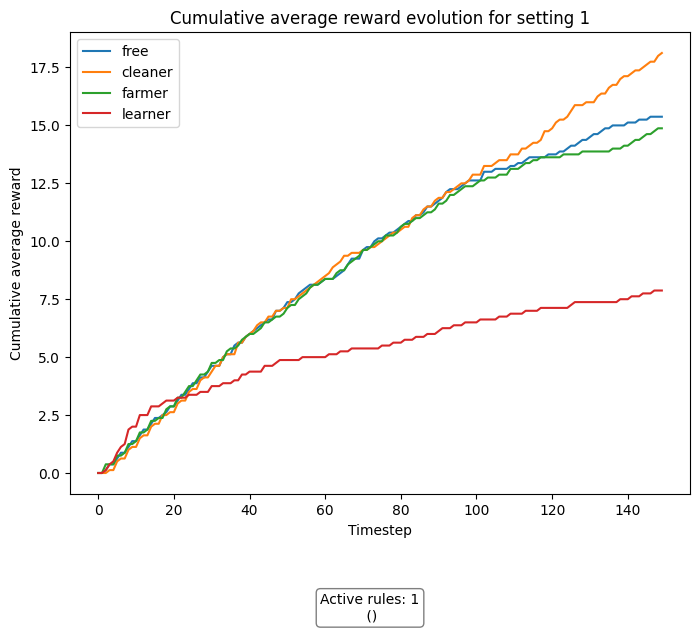

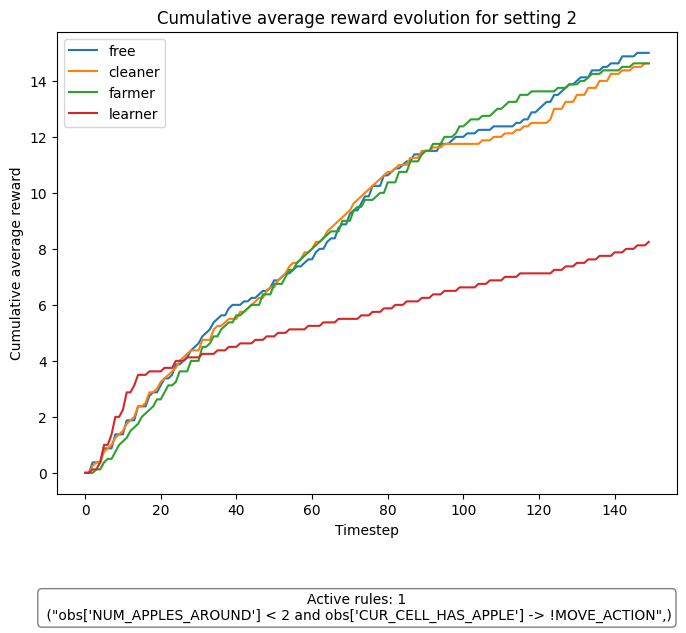

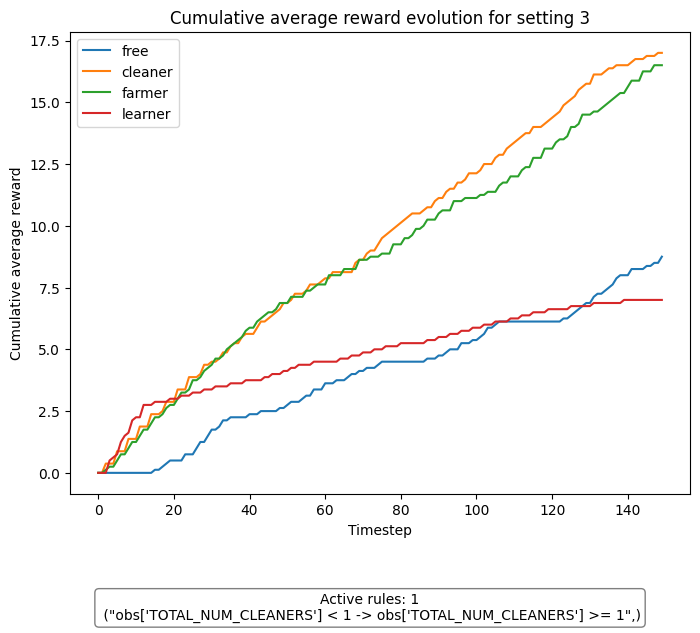

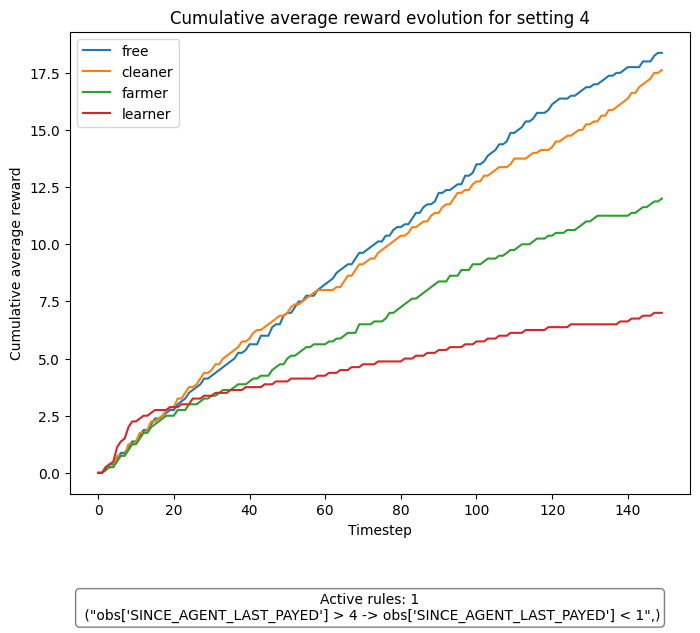

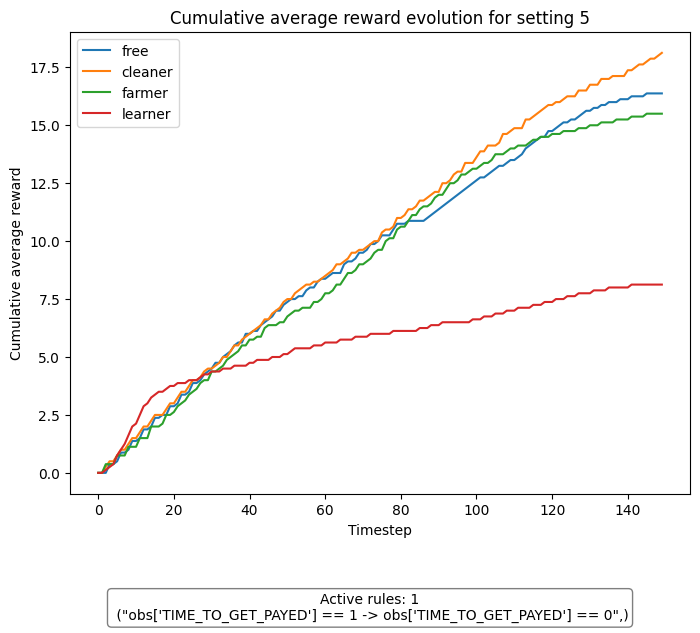

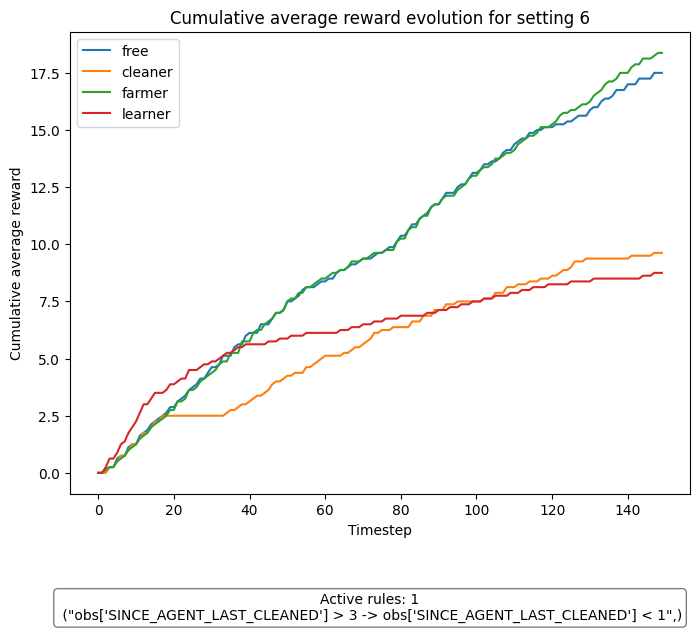

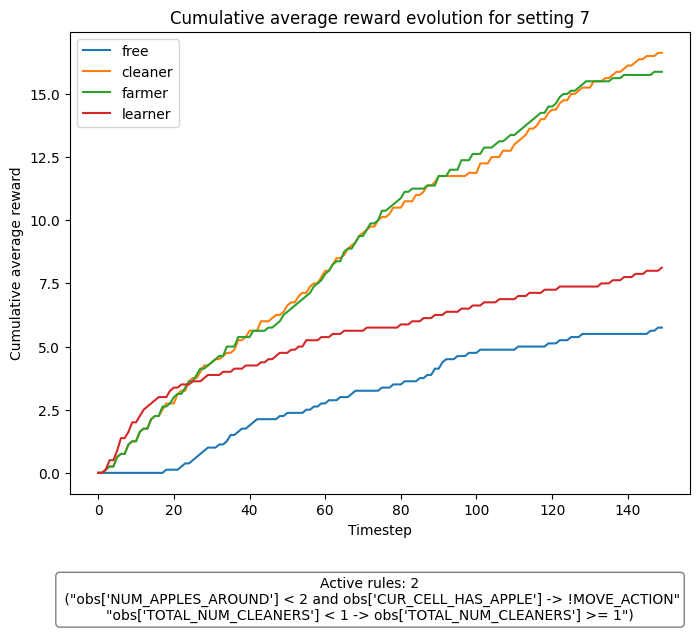

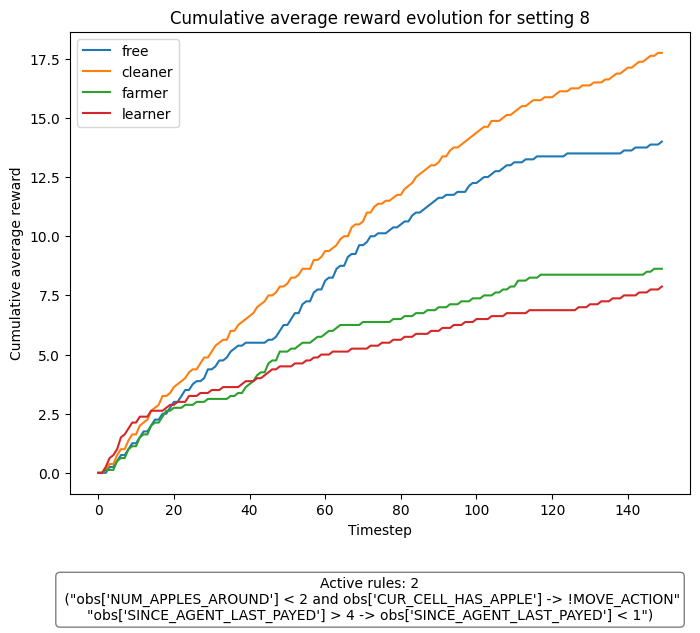

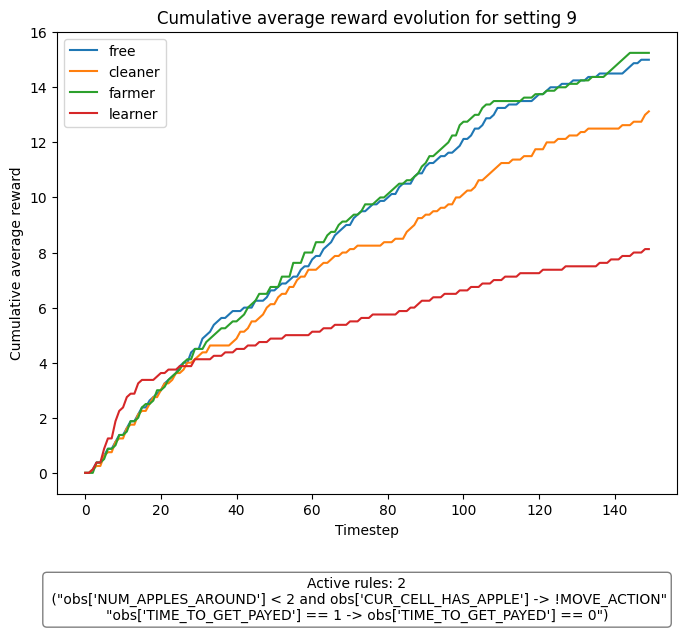

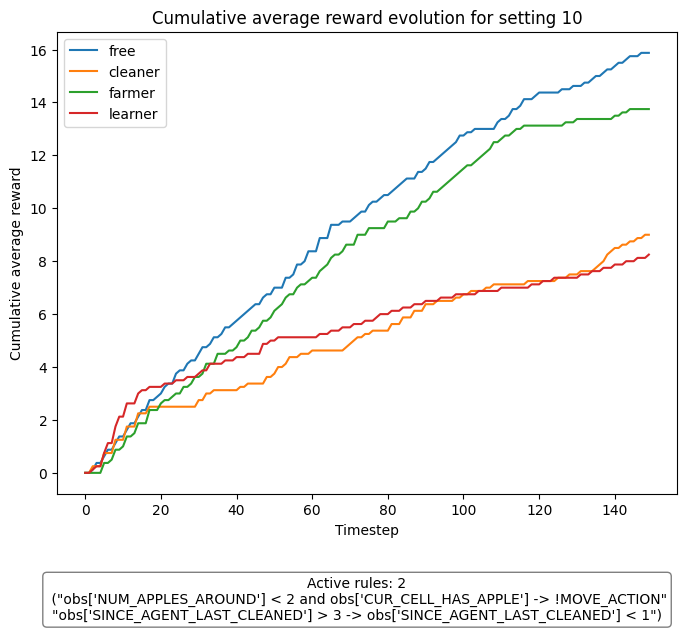

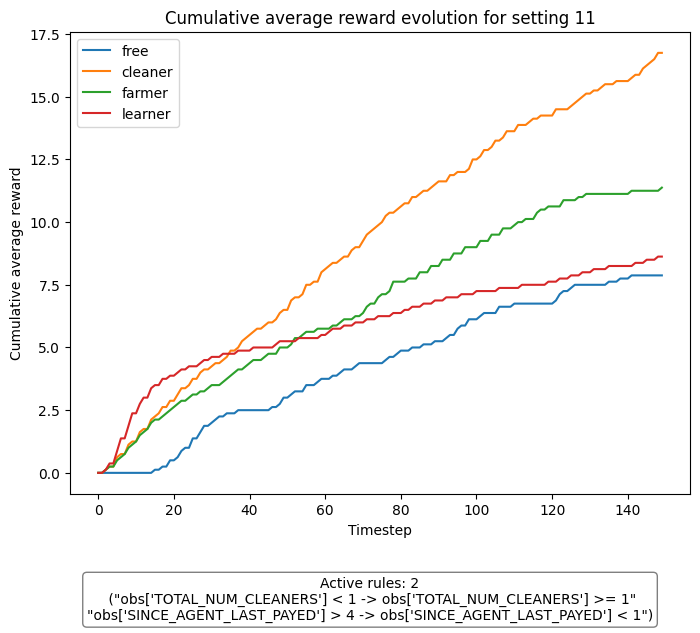

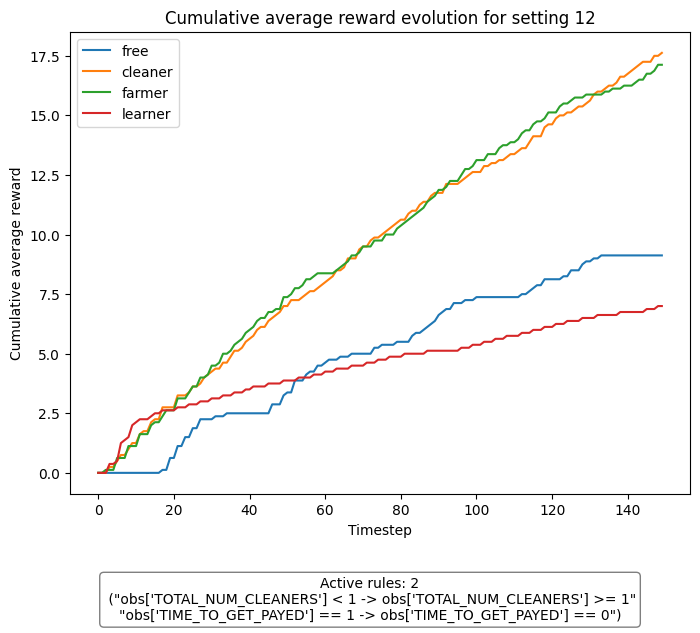

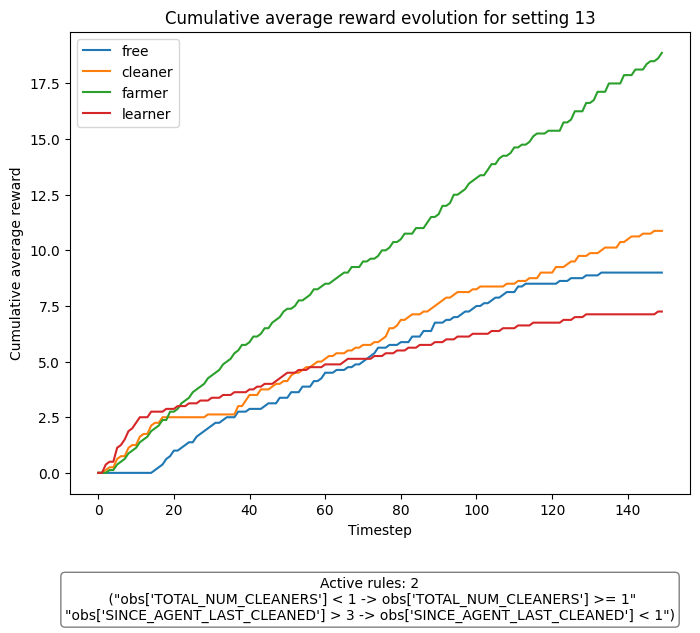

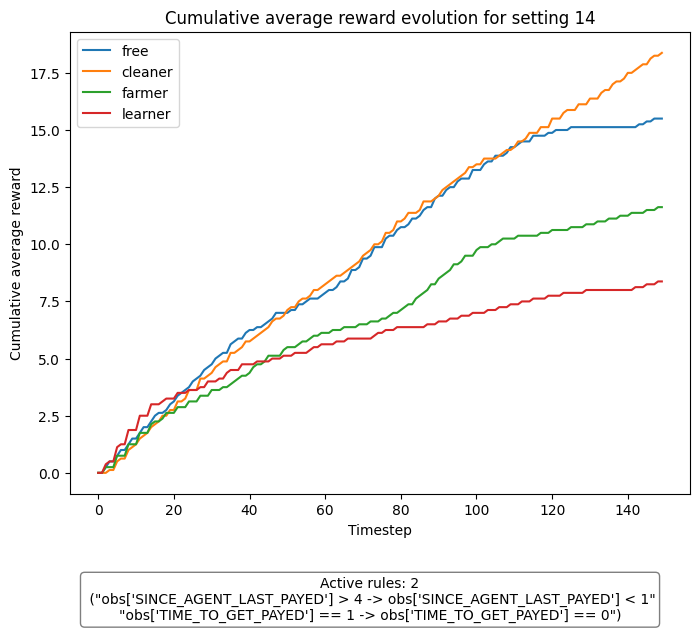

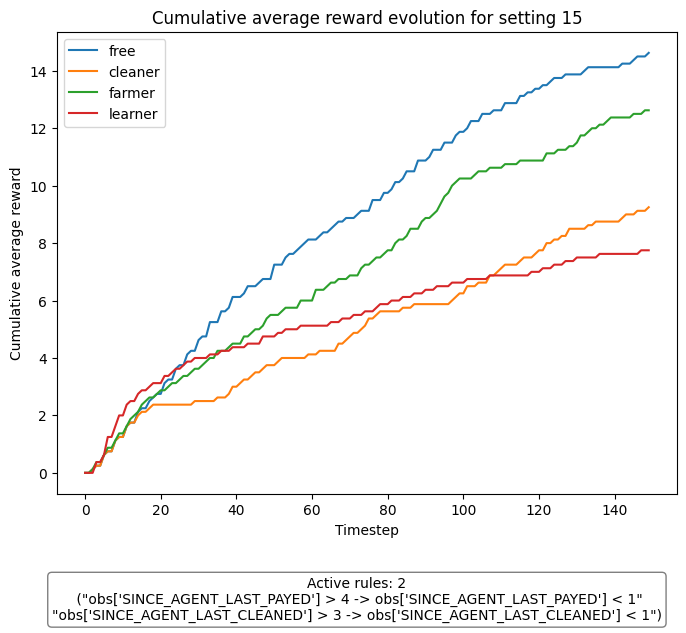

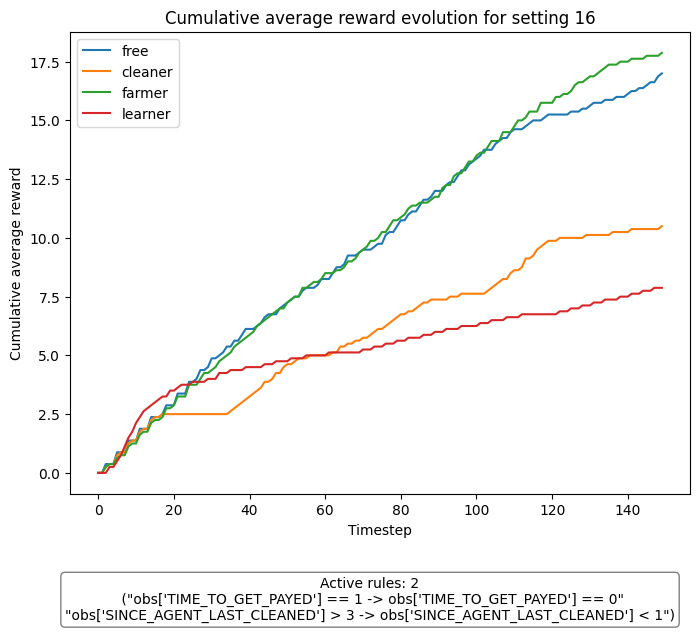

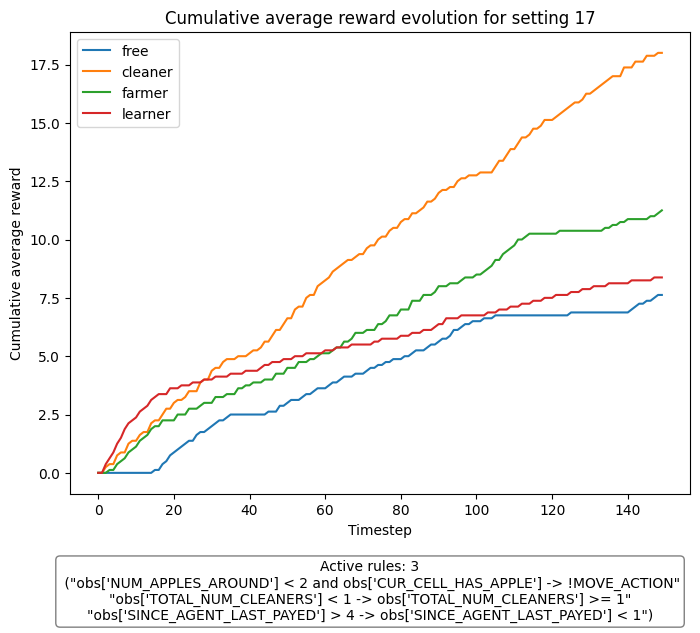

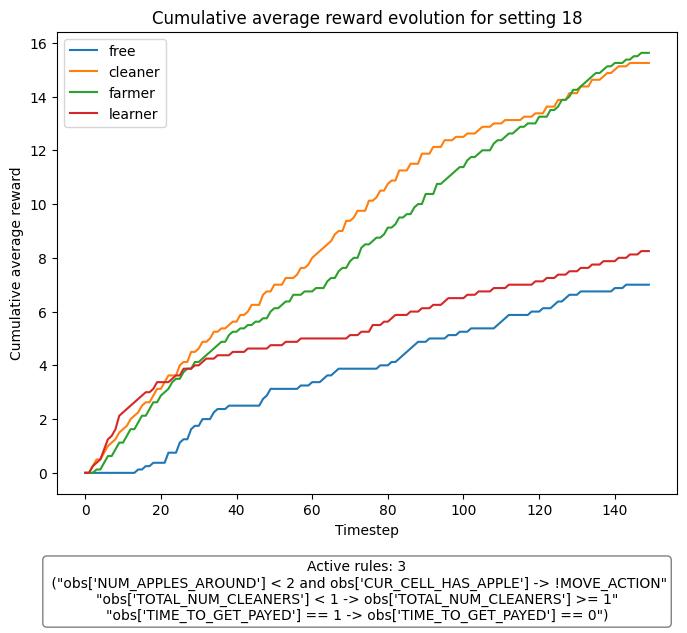

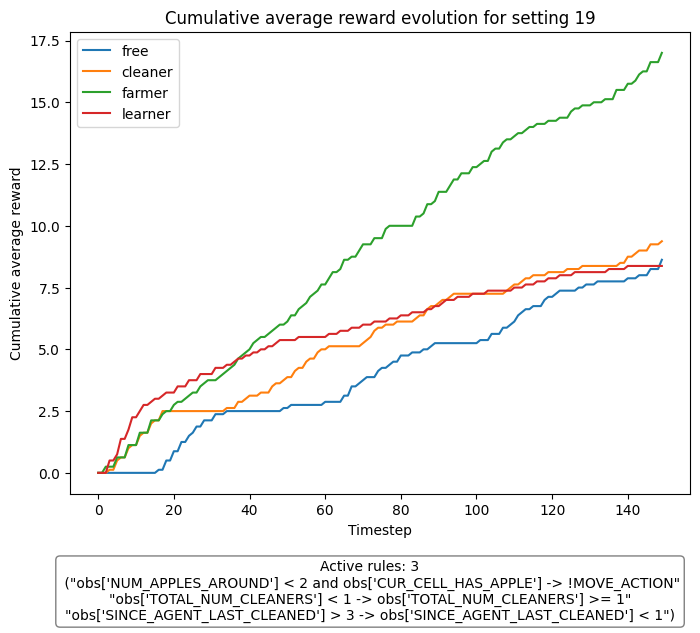

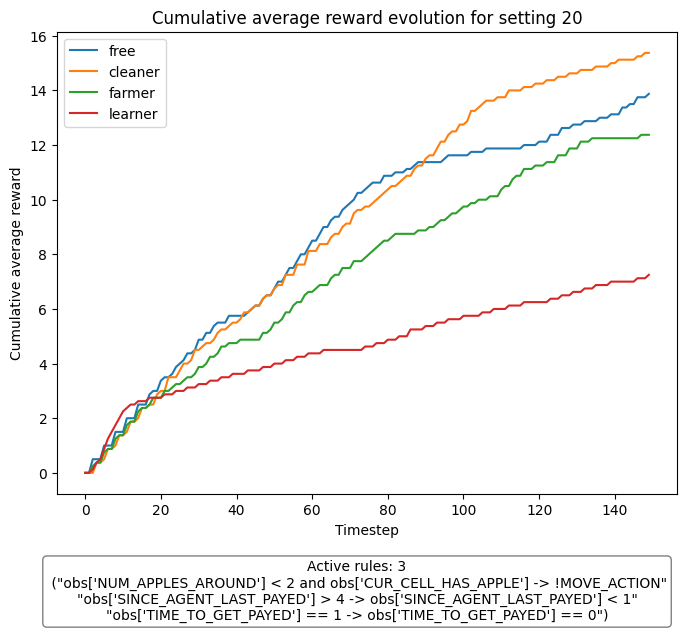

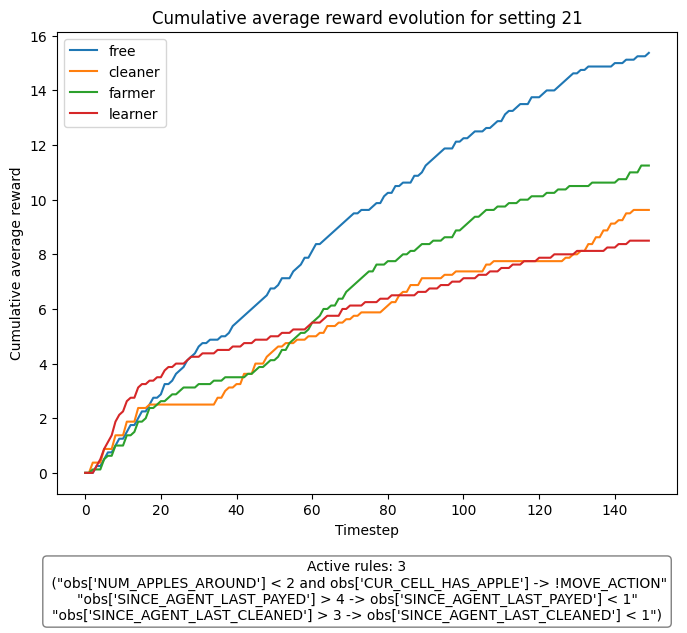

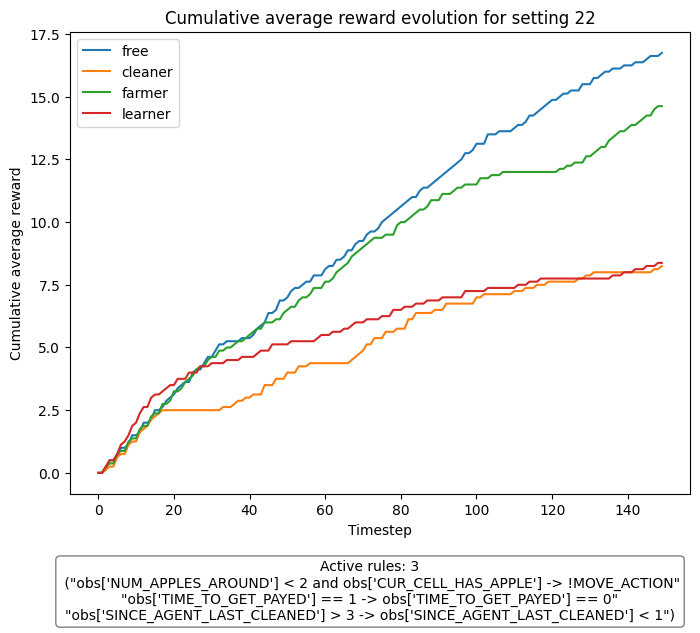

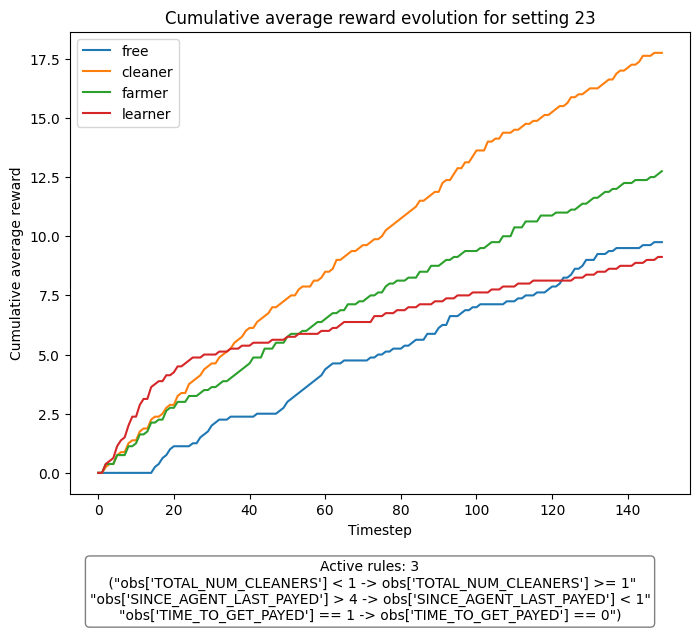

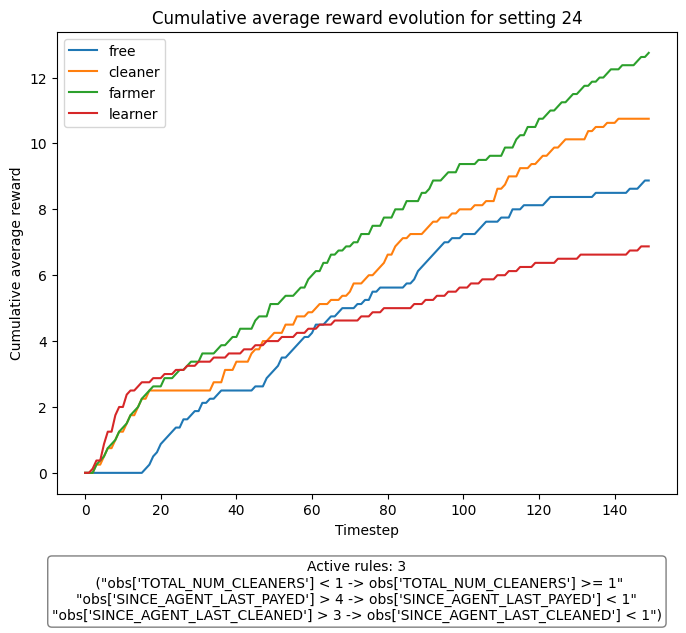

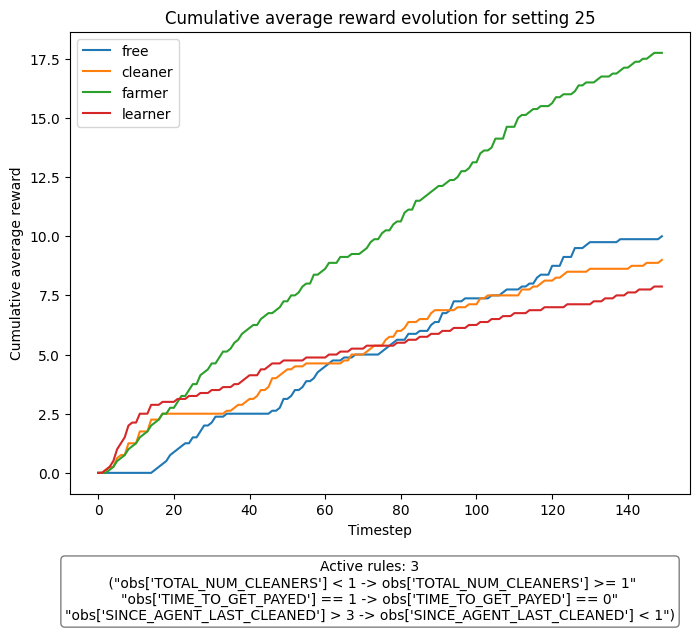

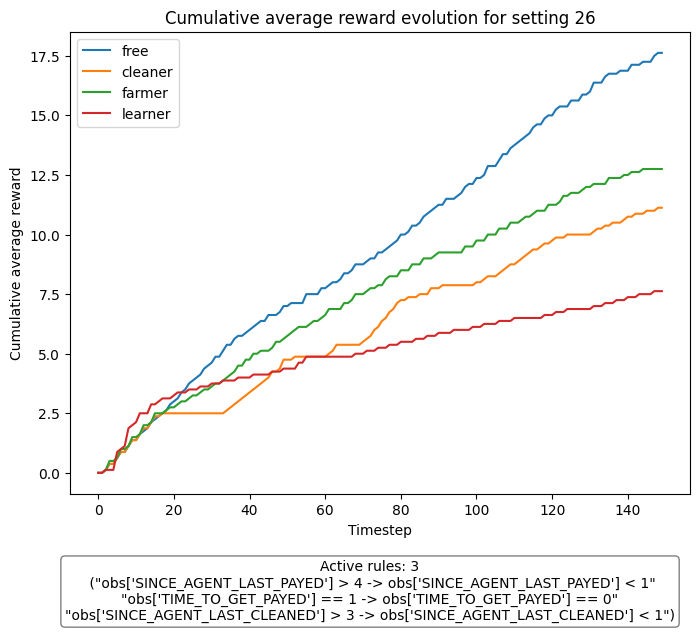

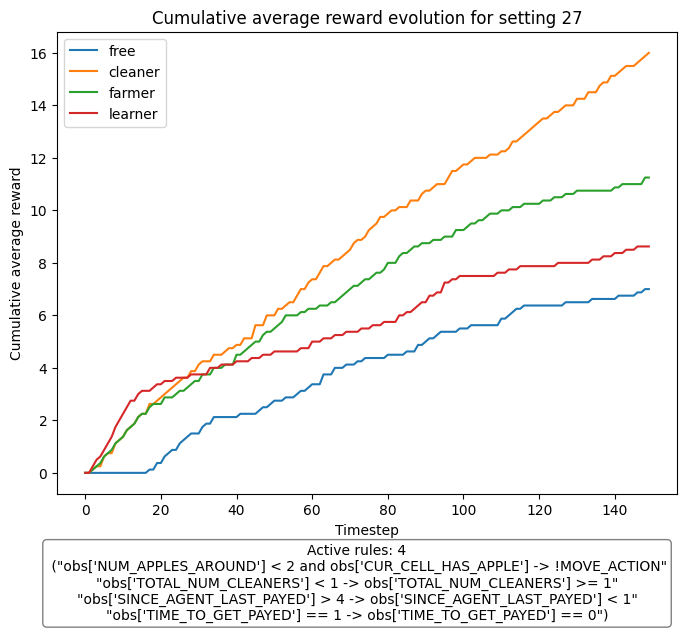

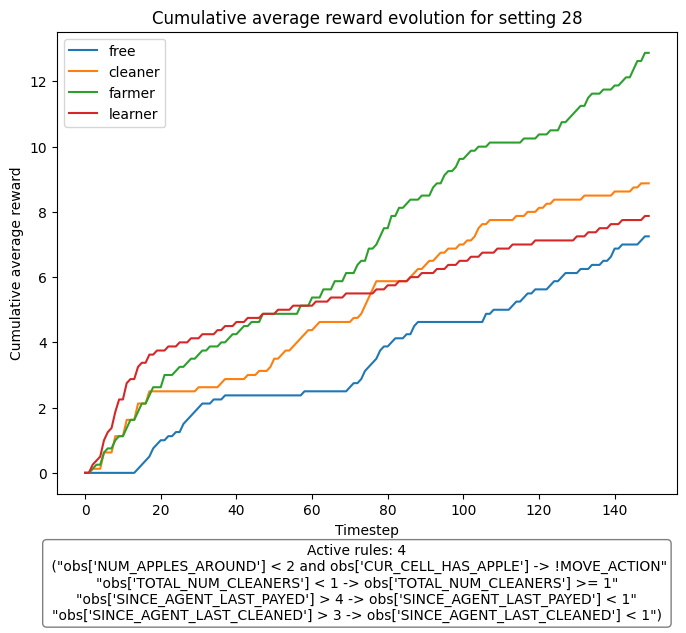

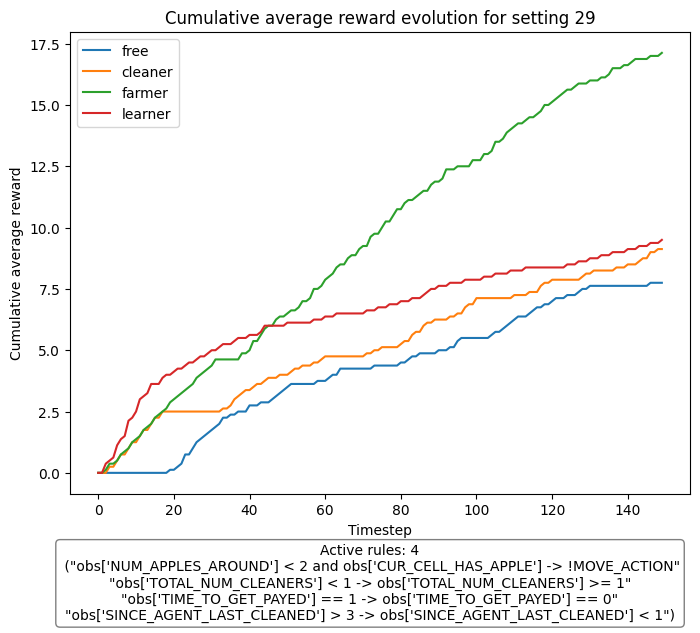

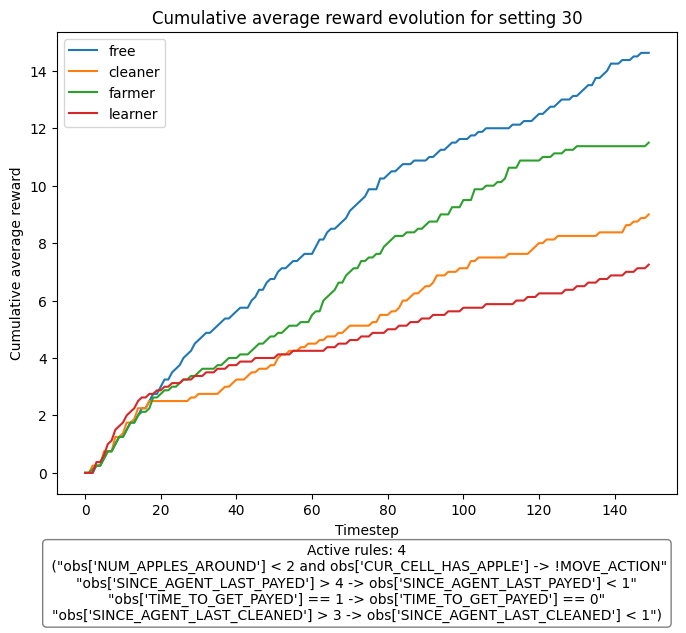

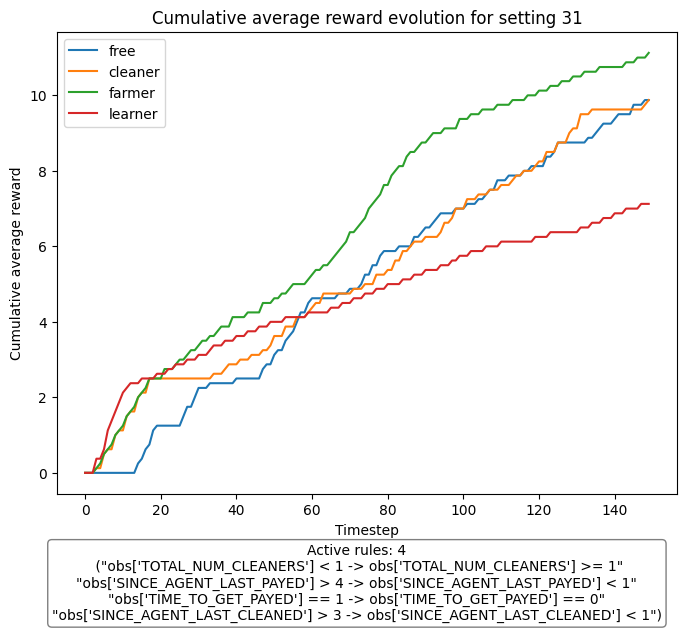

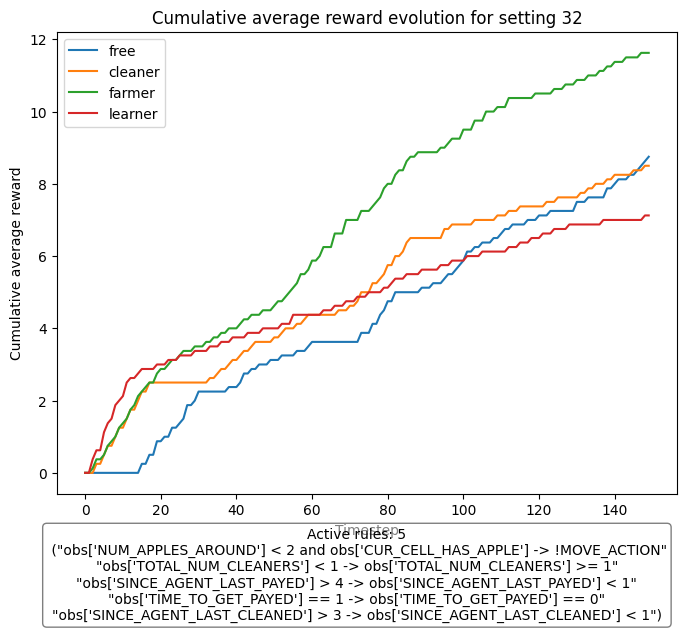

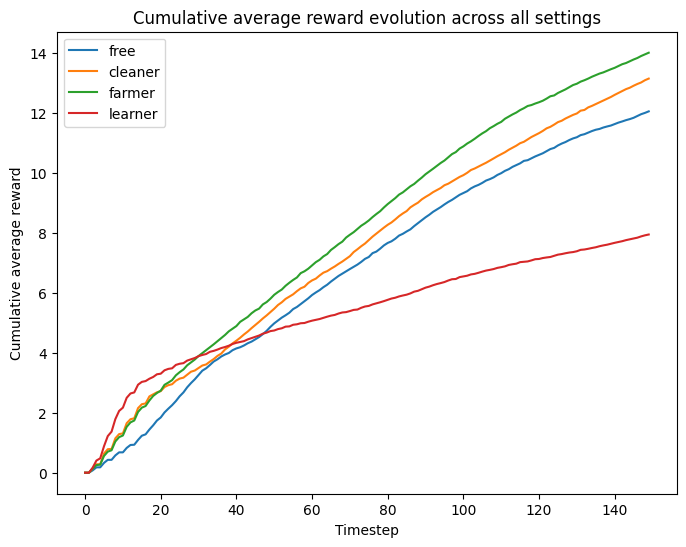

In [49]:
# Assume your data is stored in a list of 32 lists called `data_list`
averages = []
for i in range(32):
    fig, ax = plt.subplots(figsize=(8,6))
    mean_rewards = pd.DataFrame() # Initialize an empty DataFrame to store the mean rewards for the current setting
    for j in range(8):
        df = rules_dfs[i][j] # Get the j-th dataframe for the i-th setting
        rewards = df.iloc[:, 1:5] # Get the first 4 columns (rewards per timestep)
        mean_rewards = mean_rewards.add(rewards, fill_value=0) # Add the rewards to the running sum in mean_rewards
    mean_rewards = mean_rewards.divide(8) # Divide the sum by the number of dataframes (8) to get the mean
    mean_rewards_cum = mean_rewards.cumsum() # Compute the cumulative mean rewards
    cur_rules = settings.iloc[i, 3].split(", ")
    rule_out = '\n'.join([str(elem) for elem in cur_rules])
    info_text = f"Active rules: {len(cur_rules)}\n {rule_out}"
    ax.text(0.5, -0.1, info_text, ha="center", transform=fig.transFigure, fontsize=10,
         bbox=dict(facecolor='white', alpha=0.5, boxstyle="round"))
    averages.append(mean_rewards) # Add the mean rewards to the list of averages for all settings
    ax.plot(mean_rewards_cum) # Plot the cumulative mean reward evolution for the current setting
    ax.set_title(f"Cumulative average reward evolution for setting {i+1}")
    ax.set_xlabel("Timestep")
    ax.set_ylabel("Cumulative average reward")
    ax.legend(labels=mean_rewards.columns) # Add a legend with the column names
    plt.show()
    
# Plot the average rewards across all settings
fig, ax = plt.subplots(figsize=(8,6))
average_rewards = pd.concat(averages).groupby(level=0).mean() # Concatenate all mean rewards and compute the average across all settings
average_rewards_cum = average_rewards.cumsum() # Compute the cumulative average rewards
ax.plot(average_rewards_cum) # Plot the cumulative average reward evolution for all settings
ax.set_title("Cumulative average reward evolution across all settings")
ax.set_xlabel("Timestep")
ax.set_ylabel("Cumulative average reward")
ax.legend(labels=average_rewards.columns) # Add a legend with the column names
plt.savefig('cum_rewards')
plt.show()